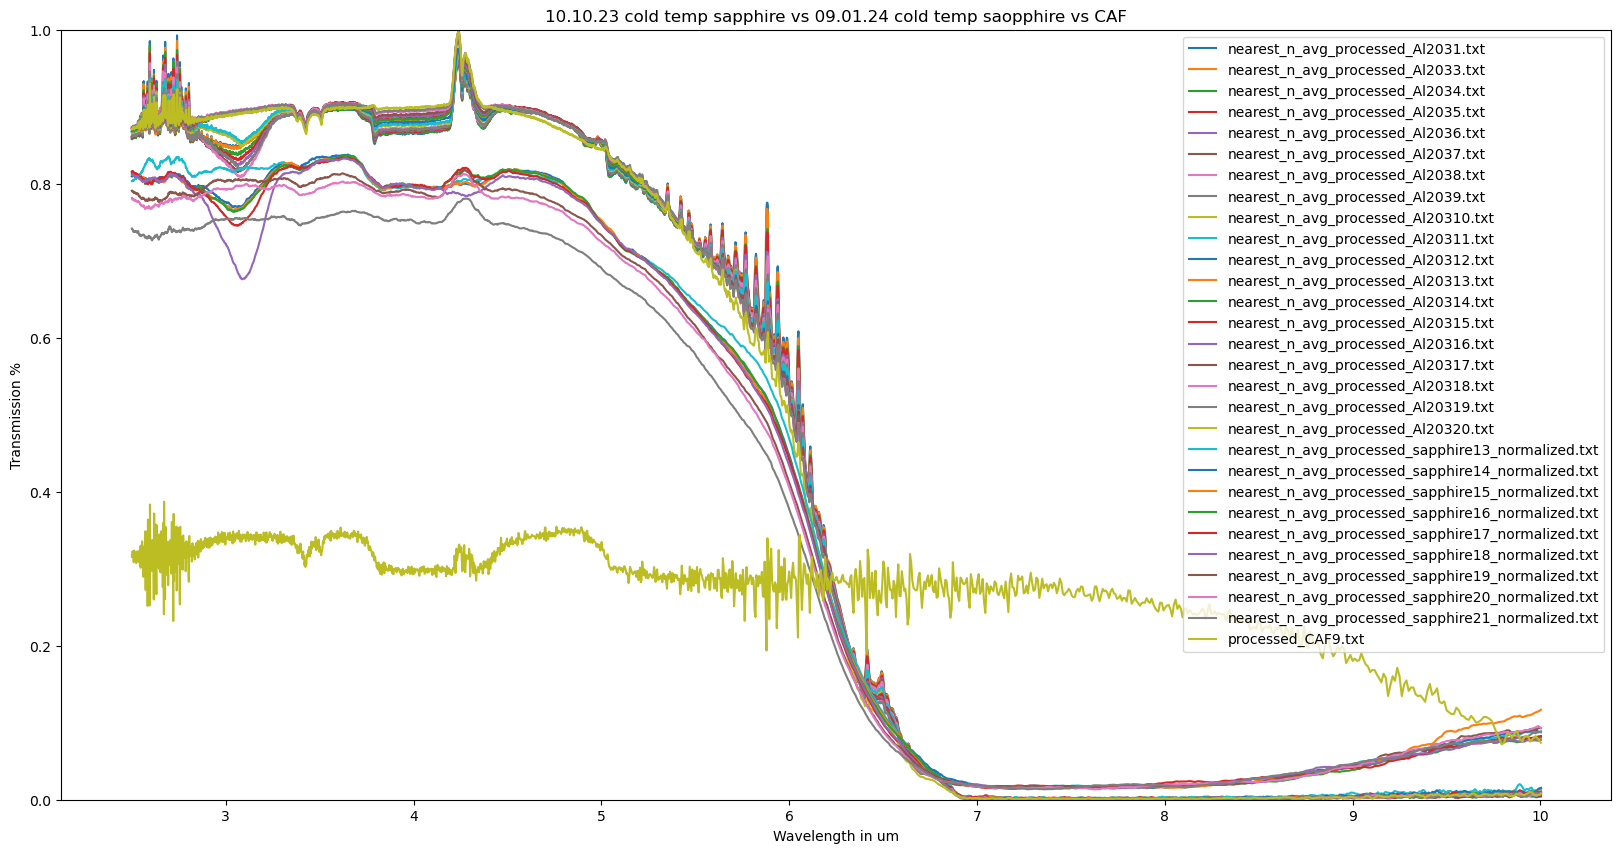

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize
import re  # Import the regular expression module
import pandas as pd

# Directories containing your text files
data_directory1 = "/Users/arpi/data/10.10.23/processed/neartest_n_averaging"
data_directory2 = "/Users/arpi/data/09.01.24/processed/normalised/nearest_neighbour"
specific_file_directory = "/Users/arpi/data/30.01.24/processed"

# Get a list of all text files in the first two directories
file_list1 = [file for file in os.listdir(data_directory1) if file.endswith(".txt")]
file_list2 = [file for file in os.listdir(data_directory2) if file.endswith(".txt")]

# Specify the specific file you want to use from the third directory
specific_file = "processed_CAF9.txt"

# Function to extract numerical part from the file name
def extract_number(file_name):
    match = re.search(r'\d+', file_name)
    if match:
        return int(match.group())
    else:
        return 0

# Function to plot the data from a file with color gradient
def plot_file(file_path, total_files):
    data = np.loadtxt(file_path)
    wavelength = data[:, 0]
    transmission = data[:, 1]

    # Define the color gradient
    cmap = plt.get_cmap('viridis')
    norm = Normalize(vmin=1, vmax=20)  # Adjust based on your specified range

    # Get the color based on the normalized file index
    file_index = extract_number(os.path.basename(file_path))
    color = cmap(norm(file_index))
    
    plt.plot(wavelength, transmission, label=os.path.basename(file_path))

# Set the figure size for the entire plot
plt.figure(figsize=(20, 10))

# Iterate through files in the first directory and plot each one with color gradient
for file_name in sorted(file_list1, key=extract_number):
    file_path = os.path.join(data_directory1, file_name)
    plot_file(file_path, len(file_list1))

# Iterate through files in the second directory and plot each one with color gradient
for file_name in sorted(file_list2, key=extract_number):
    file_path = os.path.join(data_directory2, file_name)
    plot_file(file_path, len(file_list2))

# Use the specific file from the third directory
specific_file_path = os.path.join(specific_file_directory, specific_file)
plot_file(specific_file_path, 1)

plt.legend()
plt.ylim(0, 1)
plt.xlabel('Wavelength in um')
plt.ylabel('Transmission %')
plt.title('10.10.23 cold temp sapphire vs 09.01.24 cold temp saopphire vs CAF')

# Show the plot
plt.show()
